### 1. Получение данных

Подготовка и чтение данных из csv файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv', names=['datetime', 'value'])

Просмотр и описание датафрейма

In [3]:
df

,datetime,value
0,2021-01-21 00:00:00,0.566647
1,2021-01-21 00:00:30,0.581701
2,2021-01-21 00:01:00,0.581947
3,2021-01-21 00:01:30,0.597256
4,2021-01-21 00:02:00,0.597441
...,...,...
2876,2021-01-21 23:58:00,0.579532
2877,2021-01-21 23:58:30,0.586731
2878,2021-01-21 23:59:00,0.586838
2879,2021-01-21 23:59:30,0.584215


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  2881 non-null   object 
 1   value     2881 non-null   float64
dtypes: float64(1), object(1)
memory usage: 45.1+ KB


График загрузки CPU

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


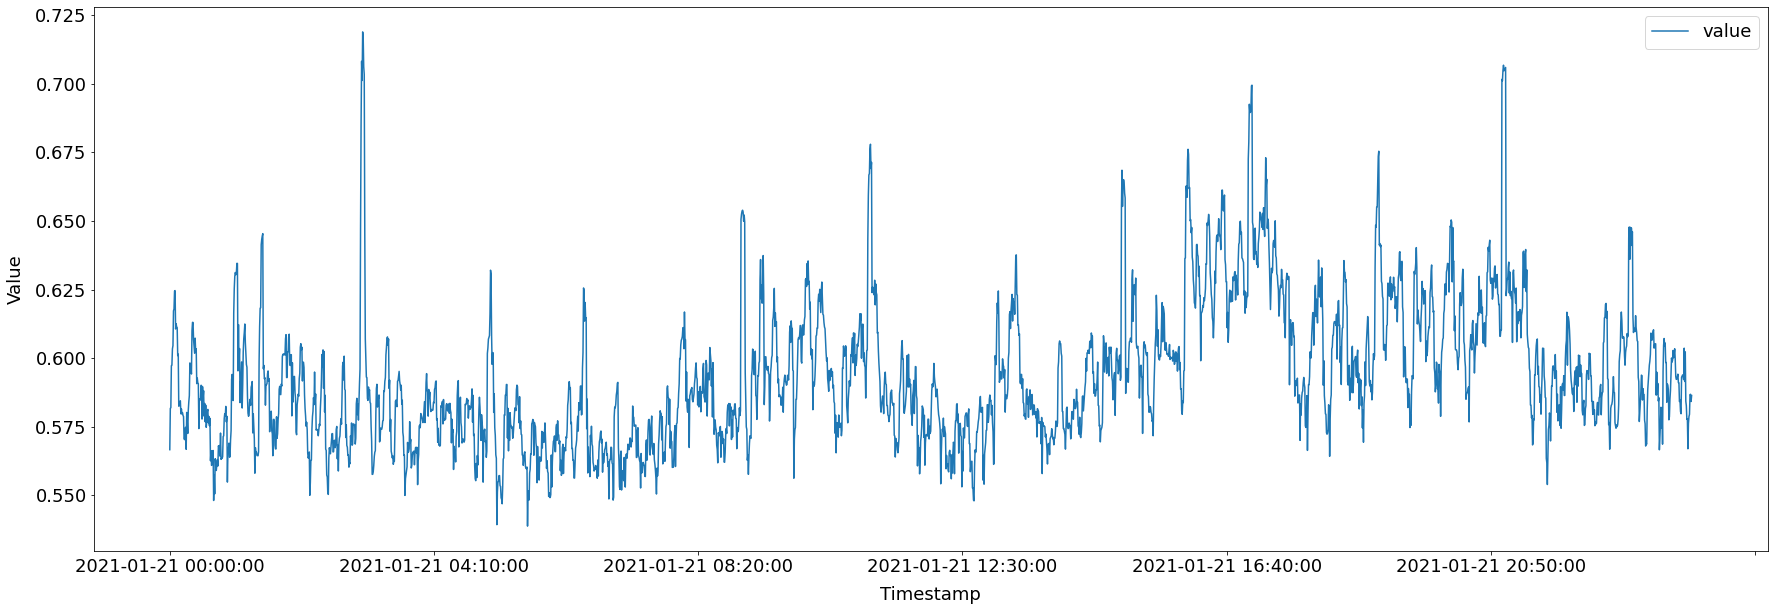

In [5]:
plt.rcParams.update({'font.size': 18})
df.plot(x='datetime', y='value',figsize = (30,10))
plt.xlabel('Timestamp', labelpad = 10)
plt.ylabel('Value', labelpad = 10)
plt.legend()

### 2. Проверка стационарности

In [6]:
import statsmodels
from statsmodels.tsa.stattools import adfuller

In [7]:
class StationarityTests:
    def __init__(self, significance=.05):
        self.SignificanceLevel = significance
        self.pValue = None
        self.isStationary = None
    def ADF_Stationarity_Test(self, timeseries, printResults = True):
        adfTest = adfuller(timeseries, autolag='AIC')
        
        self.pValue = adfTest[1]
        
        if (self.pValue<self.SignificanceLevel):
            self.isStationary = True
        else:
            self.isStationary = False
        
        if printResults:
            dfResults = pd.Series(adfTest[0:4], index=['ADF Test Statistic','P-Value','# Lags Used','# Observations Used'])
            for key,value in adfTest[4].items():
                dfResults['Critical Value (%s)'%key] = value
            print('Augmented Dickey-Fuller Test Results:')
            print(dfResults)

In [8]:
sTest = StationarityTests()
sTest.ADF_Stationarity_Test(df['value'], printResults = True)
print("Is the time series stationary? {0}".format(sTest.isStationary))

Augmented Dickey-Fuller Test Results:
ADF Test Statistic        -4.510058
P-Value                    0.000189
# Lags Used               28.000000
# Observations Used     2852.000000
Critical Value (1%)       -3.432645
Critical Value (5%)       -2.862554
Critical Value (10%)      -2.567310
dtype: float64
Is the time series stationary? True


### 3. Проверка методов машинного обучения

#### 3.1 RandomForestRegressor

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Преобразование типа для времени в unix timestamp

In [10]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['datetime'] = df['datetime'].astype(np.int64)// 10**9

In [11]:
df

,datetime,value
0,1611187200,0.566647
1,1611187230,0.581701
2,1611187260,0.581947
3,1611187290,0.597256
4,1611187320,0.597441
...,...,...
2876,1611273480,0.579532
2877,1611273510,0.586731
2878,1611273540,0.586838
2879,1611273570,0.584215


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2881 entries, 0 to 2880
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   datetime  2881 non-null   int64  
 1   value     2881 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 45.1 KB


Разделение величин

In [13]:
X = df.drop('value', axis = 1)
y = df['value']

In [14]:
X

,datetime
0,1611187200
1,1611187230
2,1611187260
3,1611187290
4,1611187320
...,...
2876,1611273480
2877,1611273510
2878,1611273540
2879,1611273570


In [15]:
y

0       0.566647
1       0.581701
2       0.581947
3       0.597256
4       0.597441
          ...   
2876    0.579532
2877    0.586731
2878    0.586838
2879    0.584215
2880    0.586383
Name: value, Length: 2881, dtype: float64

Разделение на test и train выборки

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
X_train

,datetime
314,1611196620
1737,1611239310
37,1611188310
425,1611199950
1161,1611222030
...,...
763,1611210090
835,1611212250
1653,1611236790
2607,1611265410


In [18]:
X_test

,datetime
569,1611204270
2172,1611252360
2423,1611259890
2245,1611254550
1804,1611241320
...,...
2308,1611256440
2438,1611260340
878,1611213540
1526,1611232980


In [19]:
y_train

314     0.568527
1737    0.601801
37      0.586340
425     0.562423
1161    0.580313
          ...   
763     0.562743
835     0.567559
1653    0.575133
2607    0.553952
2732    0.593268
Name: value, Length: 2304, dtype: float64

In [20]:
y_test

569     0.581666
2172    0.612841
2423    0.648105
2245    0.593791
1804    0.664110
          ...   
2308    0.622594
2438    0.595793
878     0.578504
1526    0.566196
2066    0.649836
Name: value, Length: 577, dtype: float64

Обучение модели и предсказание

In [21]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

Проверка коэффициента детерминации

In [22]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, predictions)
print('Значение метрики MAE: ', mae)
print('Значение метрики MSE: ', mse)
print('Значение метрики RMSE: ', rmse)
print('Значение метрики R2: ', r2)

Значение метрики MAE:  0.006467931217406469
Значение метрики MSE:  9.932610060873523e-05
Значение метрики RMSE:  0.009966248070800527
Значение метрики R2:  0.8531562146104532


Преобразование типов и создание графика

In [23]:
X_test['datetime'] = pd.to_datetime(X_test['datetime'], unit='s')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
result = X_test
result['real'] = y_test
result['prediction'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
result

,datetime,real,prediction
569,2021-01-21 04:44:30,0.581666,0.582031
2172,2021-01-21 18:06:00,0.612841,0.621560
2423,2021-01-21 20:11:30,0.648105,0.641832
2245,2021-01-21 18:42:30,0.593791,0.599723
1804,2021-01-21 15:02:00,0.664110,0.657548
...,...,...,...
2308,2021-01-21 19:14:00,0.622594,0.625032
2438,2021-01-21 20:19:00,0.595793,0.601318
878,2021-01-21 07:19:00,0.578504,0.576009
1526,2021-01-21 12:43:00,0.566196,0.572470


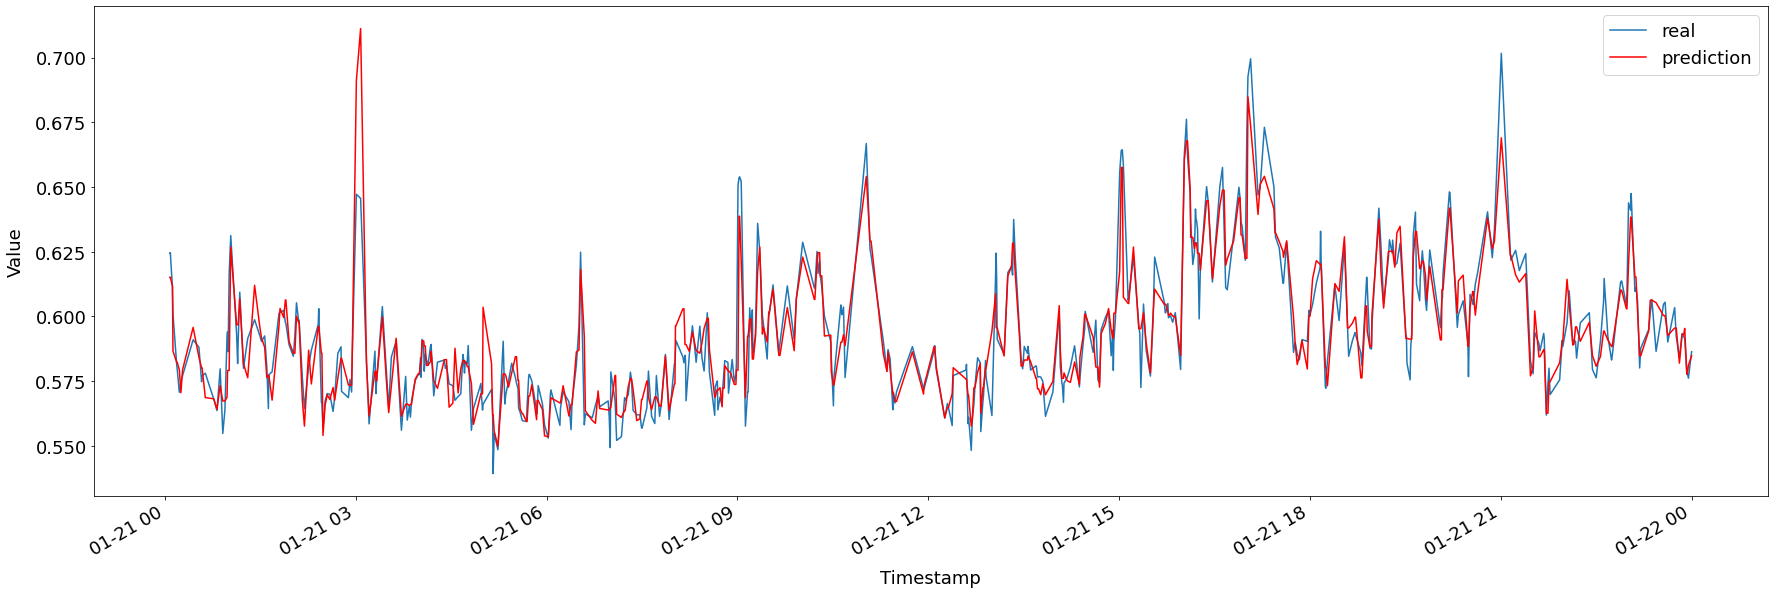

In [26]:
ax = plt.gca()

result.plot(kind='line',x='datetime',y='real',ax=ax, figsize = (30,10))
result.plot(kind='line',x='datetime',y='prediction', color='red', ax=ax)
plt.xlabel('Timestamp', labelpad = 10)
plt.ylabel('Value', labelpad = 10)

plt.show()

#### 3.2 GradientBoostingRegressor

In [27]:
from sklearn.ensemble import GradientBoostingRegressor

In [28]:
df

,datetime,value
0,1611187200,0.566647
1,1611187230,0.581701
2,1611187260,0.581947
3,1611187290,0.597256
4,1611187320,0.597441
...,...,...
2876,1611273480,0.579532
2877,1611273510,0.586731
2878,1611273540,0.586838
2879,1611273570,0.584215


In [29]:
X = df.drop('value', axis = 1)
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [30]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [31]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, predictions)
print('Значение метрики MAE: ', mae)
print('Значение метрики MSE: ', mse)
print('Значение метрики RMSE: ', rmse)
print('Значение метрики R2: ', r2)

Значение метрики MAE:  0.010709761735117916
Значение метрики MSE:  0.00020897092593937666
Значение метрики RMSE:  0.014455826712415193
Значение метрики R2:  0.691057218462898


In [32]:
X_test['datetime'] = pd.to_datetime(X_test['datetime'], unit='s')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
result = X_test
result['real'] = y_test
result['prediction'] = predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
result

,datetime,real,prediction
569,2021-01-21 04:44:30,0.581666,0.577816
2172,2021-01-21 18:06:00,0.612841,0.609952
2423,2021-01-21 20:11:30,0.648105,0.616700
2245,2021-01-21 18:42:30,0.593791,0.601101
1804,2021-01-21 15:02:00,0.664110,0.611820
...,...,...,...
2308,2021-01-21 19:14:00,0.622594,0.616560
2438,2021-01-21 20:19:00,0.595793,0.613289
878,2021-01-21 07:19:00,0.578504,0.569057
1526,2021-01-21 12:43:00,0.566196,0.575749


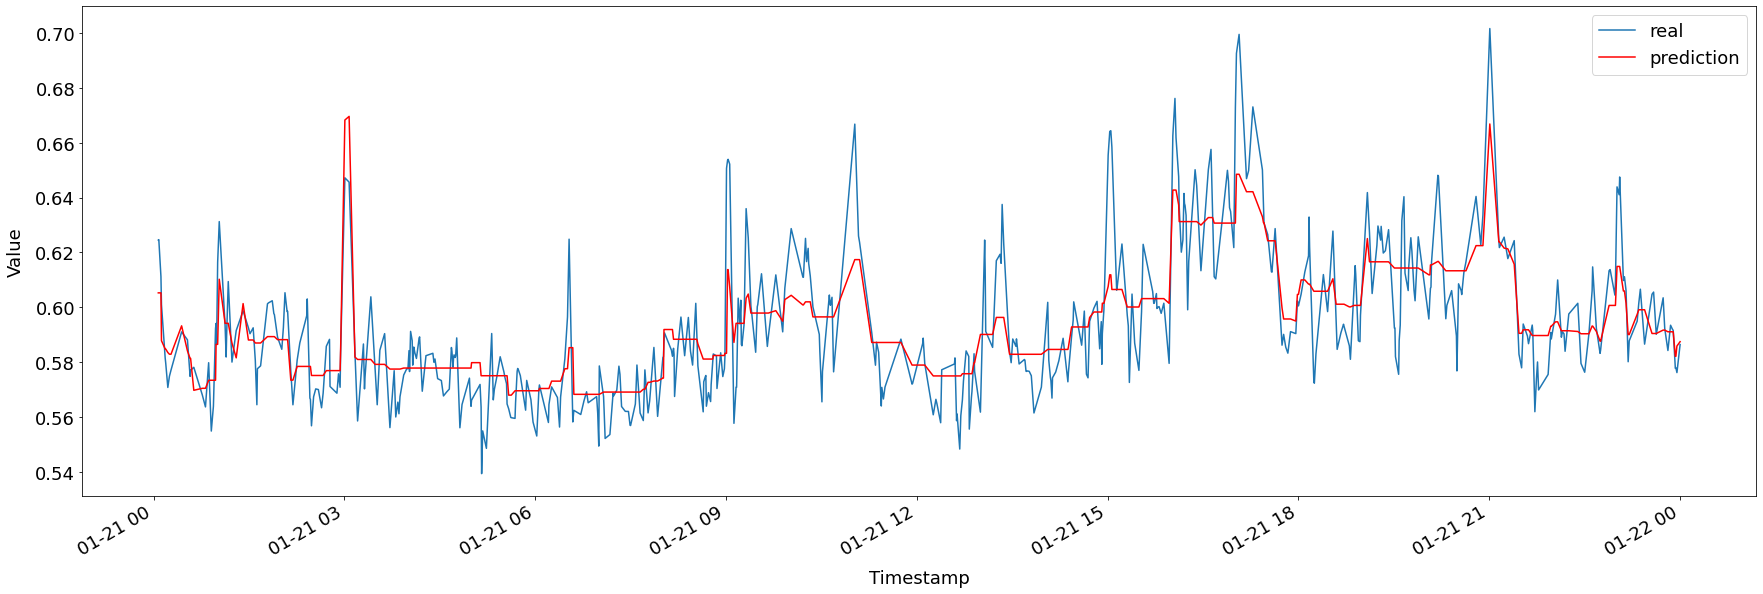

In [35]:
ax = plt.gca()

result.plot(kind='line',x='datetime',y='real',ax=ax, figsize = (30,10))
result.plot(kind='line',x='datetime',y='prediction', color='red', ax=ax)
plt.xlabel('Timestamp', labelpad = 10)
plt.ylabel('Value', labelpad = 10)

plt.show()

#### 3.2 StackingRegressor

In [36]:
df

,datetime,value
0,1611187200,0.566647
1,1611187230,0.581701
2,1611187260,0.581947
3,1611187290,0.597256
4,1611187320,0.597441
...,...,...
2876,1611273480,0.579532
2877,1611273510,0.586731
2878,1611273540,0.586838
2879,1611273570,0.584215


In [37]:
X = df.drop('value', axis = 1)
y = df['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

level0 = list()
level0.append(('knn', KNeighborsRegressor()))
level0.append(('cart', DecisionTreeRegressor()))
level0.append(('svm', SVR()))

level1 = LinearRegression()

model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)  
r2 = r2_score(y_test, predictions)
print('Значение метрики MAE: ', mae)
print('Значение метрики MSE: ', mse)
print('Значение метрики RMSE: ', rmse)
print('Значение метрики R2: ', r2)

Значение метрики MAE:  0.005744796456952496
Значение метрики MSE:  7.021241132079411e-05
Значение метрики RMSE:  0.008379284654479409
Значение метрики R2:  0.8961979157896536


In [40]:
X_test['datetime'] = pd.to_datetime(X_test['datetime'], unit='s')
result = X_test
result['real'] = y_test
result['prediction'] = predictions
result

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,datetime,real,prediction
569,2021-01-21 04:44:30,0.581666,0.582102
2172,2021-01-21 18:06:00,0.612841,0.624752
2423,2021-01-21 20:11:30,0.648105,0.641936
2245,2021-01-21 18:42:30,0.593791,0.600609
1804,2021-01-21 15:02:00,0.664110,0.653927
...,...,...,...
2308,2021-01-21 19:14:00,0.622594,0.626282
2438,2021-01-21 20:19:00,0.595793,0.603649
878,2021-01-21 07:19:00,0.578504,0.575989
1526,2021-01-21 12:43:00,0.566196,0.568020


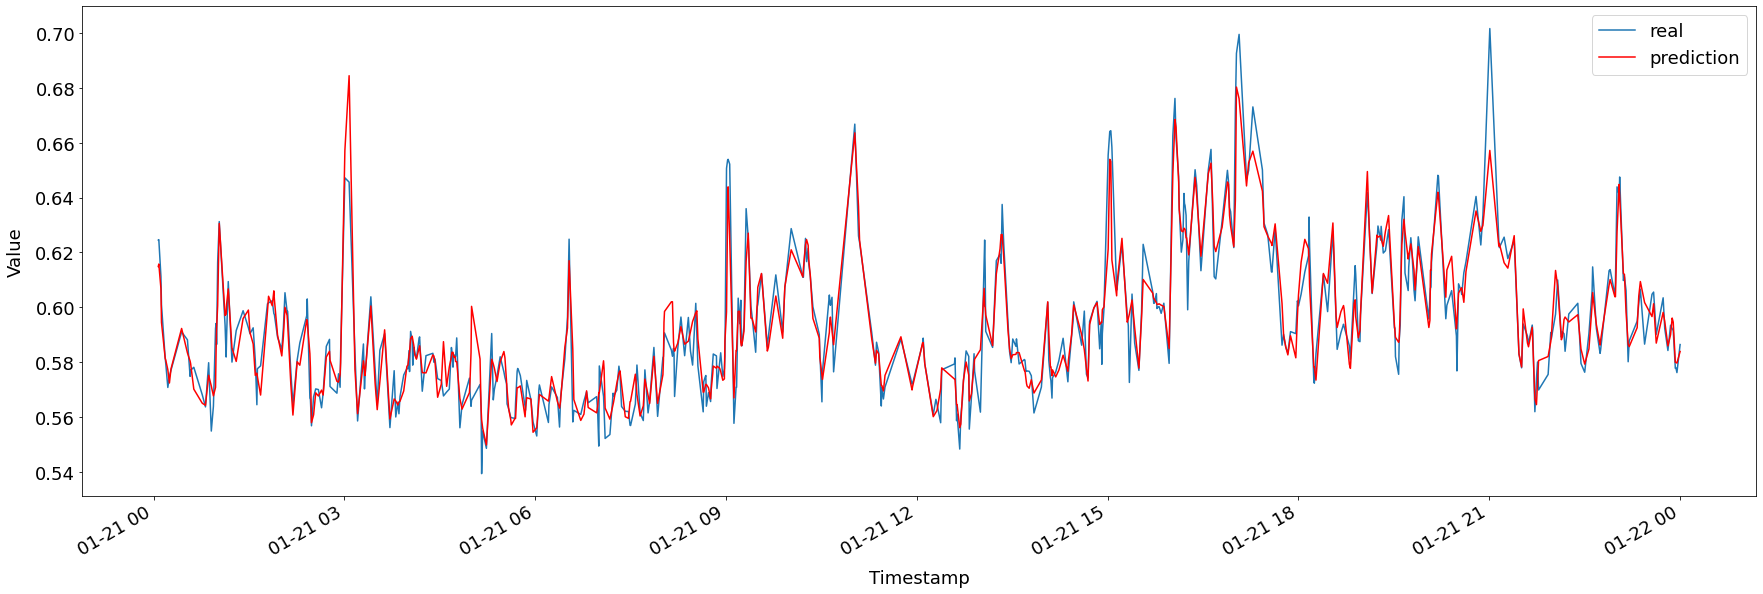

In [41]:
ax = plt.gca()

result.plot(kind='line',x='datetime',y='real',ax=ax, figsize = (30,10))
result.plot(kind='line',x='datetime',y='prediction', color='red', ax=ax)
plt.xlabel('Timestamp', labelpad = 10)
plt.ylabel('Value', labelpad = 10)

plt.show()